# Decision Tree - Multiclass

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
iris = pd.read_csv("D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab9 - DT/iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

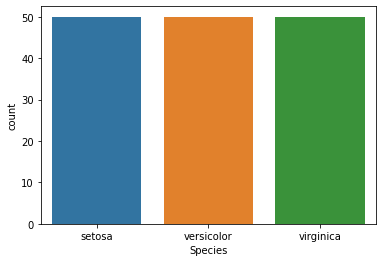

In [4]:
print(iris['Species'].value_counts())
sns.countplot(x='Species', data=iris)

In [5]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [6]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [8]:
y_test.head()

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
Name: Species, dtype: object

In [9]:
# Create decision tree classifer object
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(dt.get_params())

# Model Accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred).round(2))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}

Accuracy: 0.97


## Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

conda install graphviz conda install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

If the abve method does not fucntion properly, pls follow the following;

1 . Download and install graphviz-2.38.msi from https://graphviz.gitlab.io/_pages/Download/Download_windows.html

2 . Set the path variable (a) Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit (b) add 'C:\Program Files (x86)\Graphviz2.38\bin'

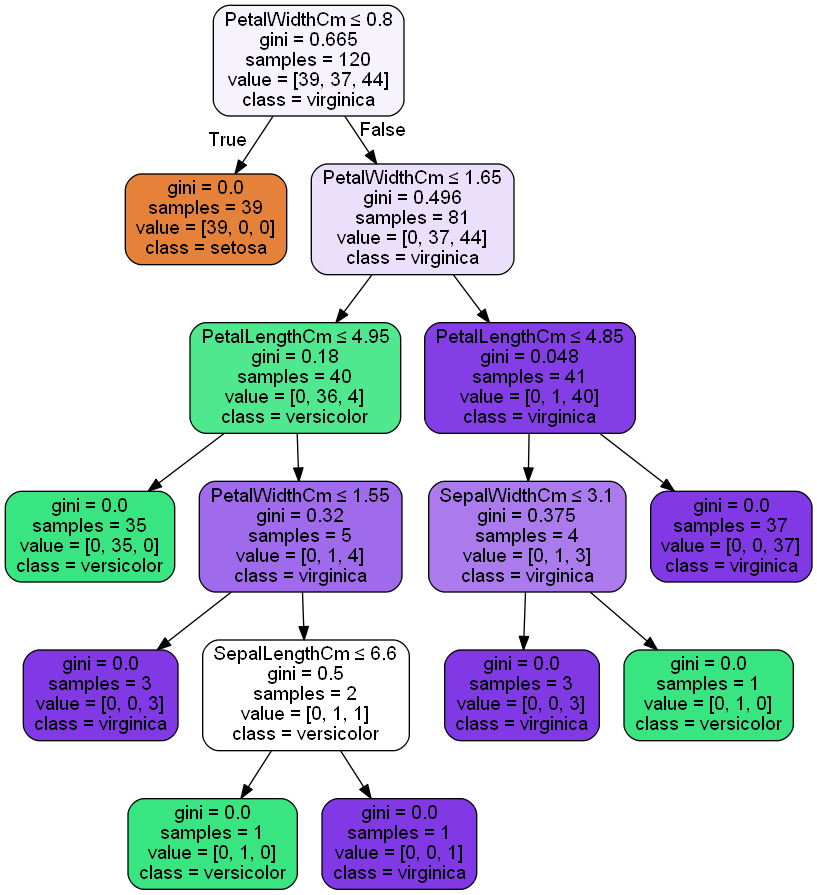

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO  

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns, class_names=['setosa','versicolor','virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab9 - DT/iris1.png')
Image(graph.create_png())

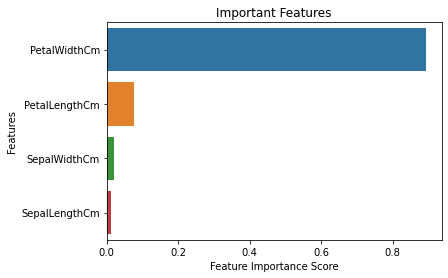

In [11]:
import matplotlib.pyplot as plt
feature_imp = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

## Grid Search CV 

In [12]:
dt = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_search_dt = GridSearchCV(dt, parameters, scoring='accuracy', cv=5)

grid_search_dt.fit(X_train,y_train)
best_parameters_dt = grid_search_dt.best_params_  
best_score_dt = grid_search_dt.best_score_ 
print(best_parameters_dt)
print(best_score_dt)

y_pred_1 = grid_search_dt.predict(X_test)

# Get the accuracy score
dt_acc=accuracy_score(y_test, y_pred_1)*100
dt_pre=precision_score(y_test, y_pred_1, average='micro')
dt_recall=recall_score(y_test, y_pred_1, average='micro')
dt_f1_=f1_score(y_test, y_pred_1, average='micro')

print("DT - Accuracy: {:.3f}.".format(dt_acc))
print("DT - Precision: {:.3f}.".format(dt_pre))
print("DT - Recall: {:.3f}.".format(dt_recall))
print("DT - F1_Score: {:.3f}.".format(dt_f1_))

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 50}
0.9666666666666668
DT - Accuracy: 96.667.
DT - Precision: 0.967.
DT - Recall: 0.967.
DT - F1_Score: 0.967.
